In [9]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import random
import ipywidgets as widgets

plt.rcParams['figure.figsize'] = (5, 5)

In [10]:
def plot_img_table(imgs, names):
    nrows = imgs.shape[0]
    ncols = imgs.shape[1]
    fig, ax = plt.subplots(nrows, ncols, figsize=(7, 7))
    for i in range(nrows):
        for j in range(ncols):
            ax[i, j].imshow(imgs[i, j], cmap='gray')
            ax[i, j].title.set_text(names[i, j])
            ax[i, j].set_xticks([])
            ax[i, j].set_yticks([])
    plt.tight_layout()

In [11]:
def showImage(img):
    plt.imshow(img, cmap='gray')
    plt.axis('off')

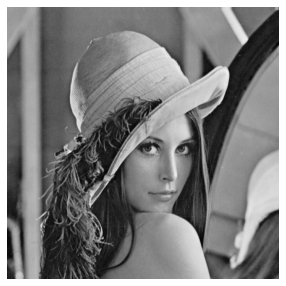

In [12]:
img = cv.imread('lena.png')
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

showImage(img)

In [13]:
def sp_noise(image,prob):
    '''
    Add salt and pepper noise to image
    prob: Probability of the noise
    '''
    output = np.zeros(image.shape,np.uint8)
    thres = 1 - prob 
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output

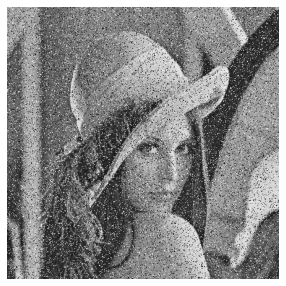

In [14]:
noisyLena = sp_noise(img, 0.07)
showImage(noisyLena)

In [15]:
# kernel should be Odd!
@widgets.interact(ksizeGauss=(1, 11, 2), ksizeMedian=(1, 11, 2), ksizeNorm=(1, 11, 2))
def filterImage(ksizeGauss=3, ksizeMedian=3, ksizeNorm=3):
    fg, ax = plt.subplots(2, 2, figsize=(7, 7))
    ax[0, 0].set_title('Noisy Lena')
    ax[0, 0].imshow(noisyLena, cmap='gray')
    ax[0, 0].axis('off')
    
    GaussFilter = cv.GaussianBlur(img, (ksizeGauss, ksizeGauss), 2)
    ax[0, 1].set_title('Gaussian Filter')
    ax[0, 1].imshow(GaussFilter, cmap='gray')
    ax[0, 1].axis('off')
    
    medianFilter = cv.medianBlur(img, ksizeMedian)
    ax[1, 0].set_title('Median Filter')
    ax[1, 0].imshow(medianFilter, cmap='gray')
    ax[1, 0].axis('off')
    
    kernel = np.ones((ksizeNorm, ksizeNorm), dtype=np.float32)
    kernel /= (ksizeNorm * ksizeNorm)
    normalizerBlur = cv.filter2D(img, -1, kernel)
    
    ax[1, 1].set_title('Normalized Filter')
    ax[1, 1].imshow(normalizerBlur, cmap='gray')
    ax[1, 1].axis('off')
    
    plt.tight_layout()

interactive(children=(IntSlider(value=3, description='ksizeGauss', max=11, min=1, step=2), IntSlider(value=3, …

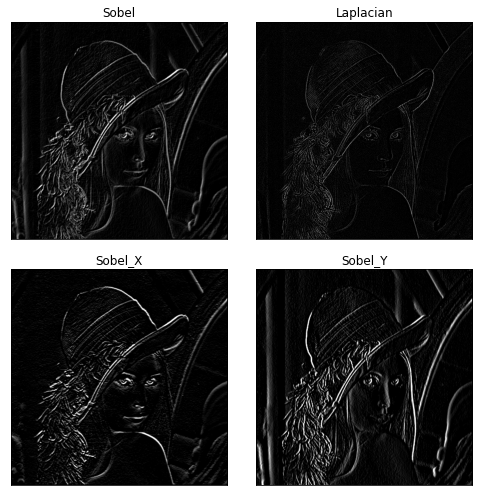

In [16]:
# Sobel
sobel_x = cv.Sobel(img, -1, 0, 1)
sobel_y = cv.Sobel(img, -1, 1, 0)
sobel = cv.addWeighted(sobel_x, 0.5, sobel_y, 0.5, 0)
laplacian = cv.Laplacian(img, -1)

edge_img = np.array([[sobel, laplacian], [sobel_x, sobel_y]])
edge_names = np.array([['Sobel', 'Laplacian'], ['Sobel_X', 'Sobel_Y']])
plot_img_table(edge_img, edge_names)

In [ ]:
# с произвольным ядром